[]
[]
[]


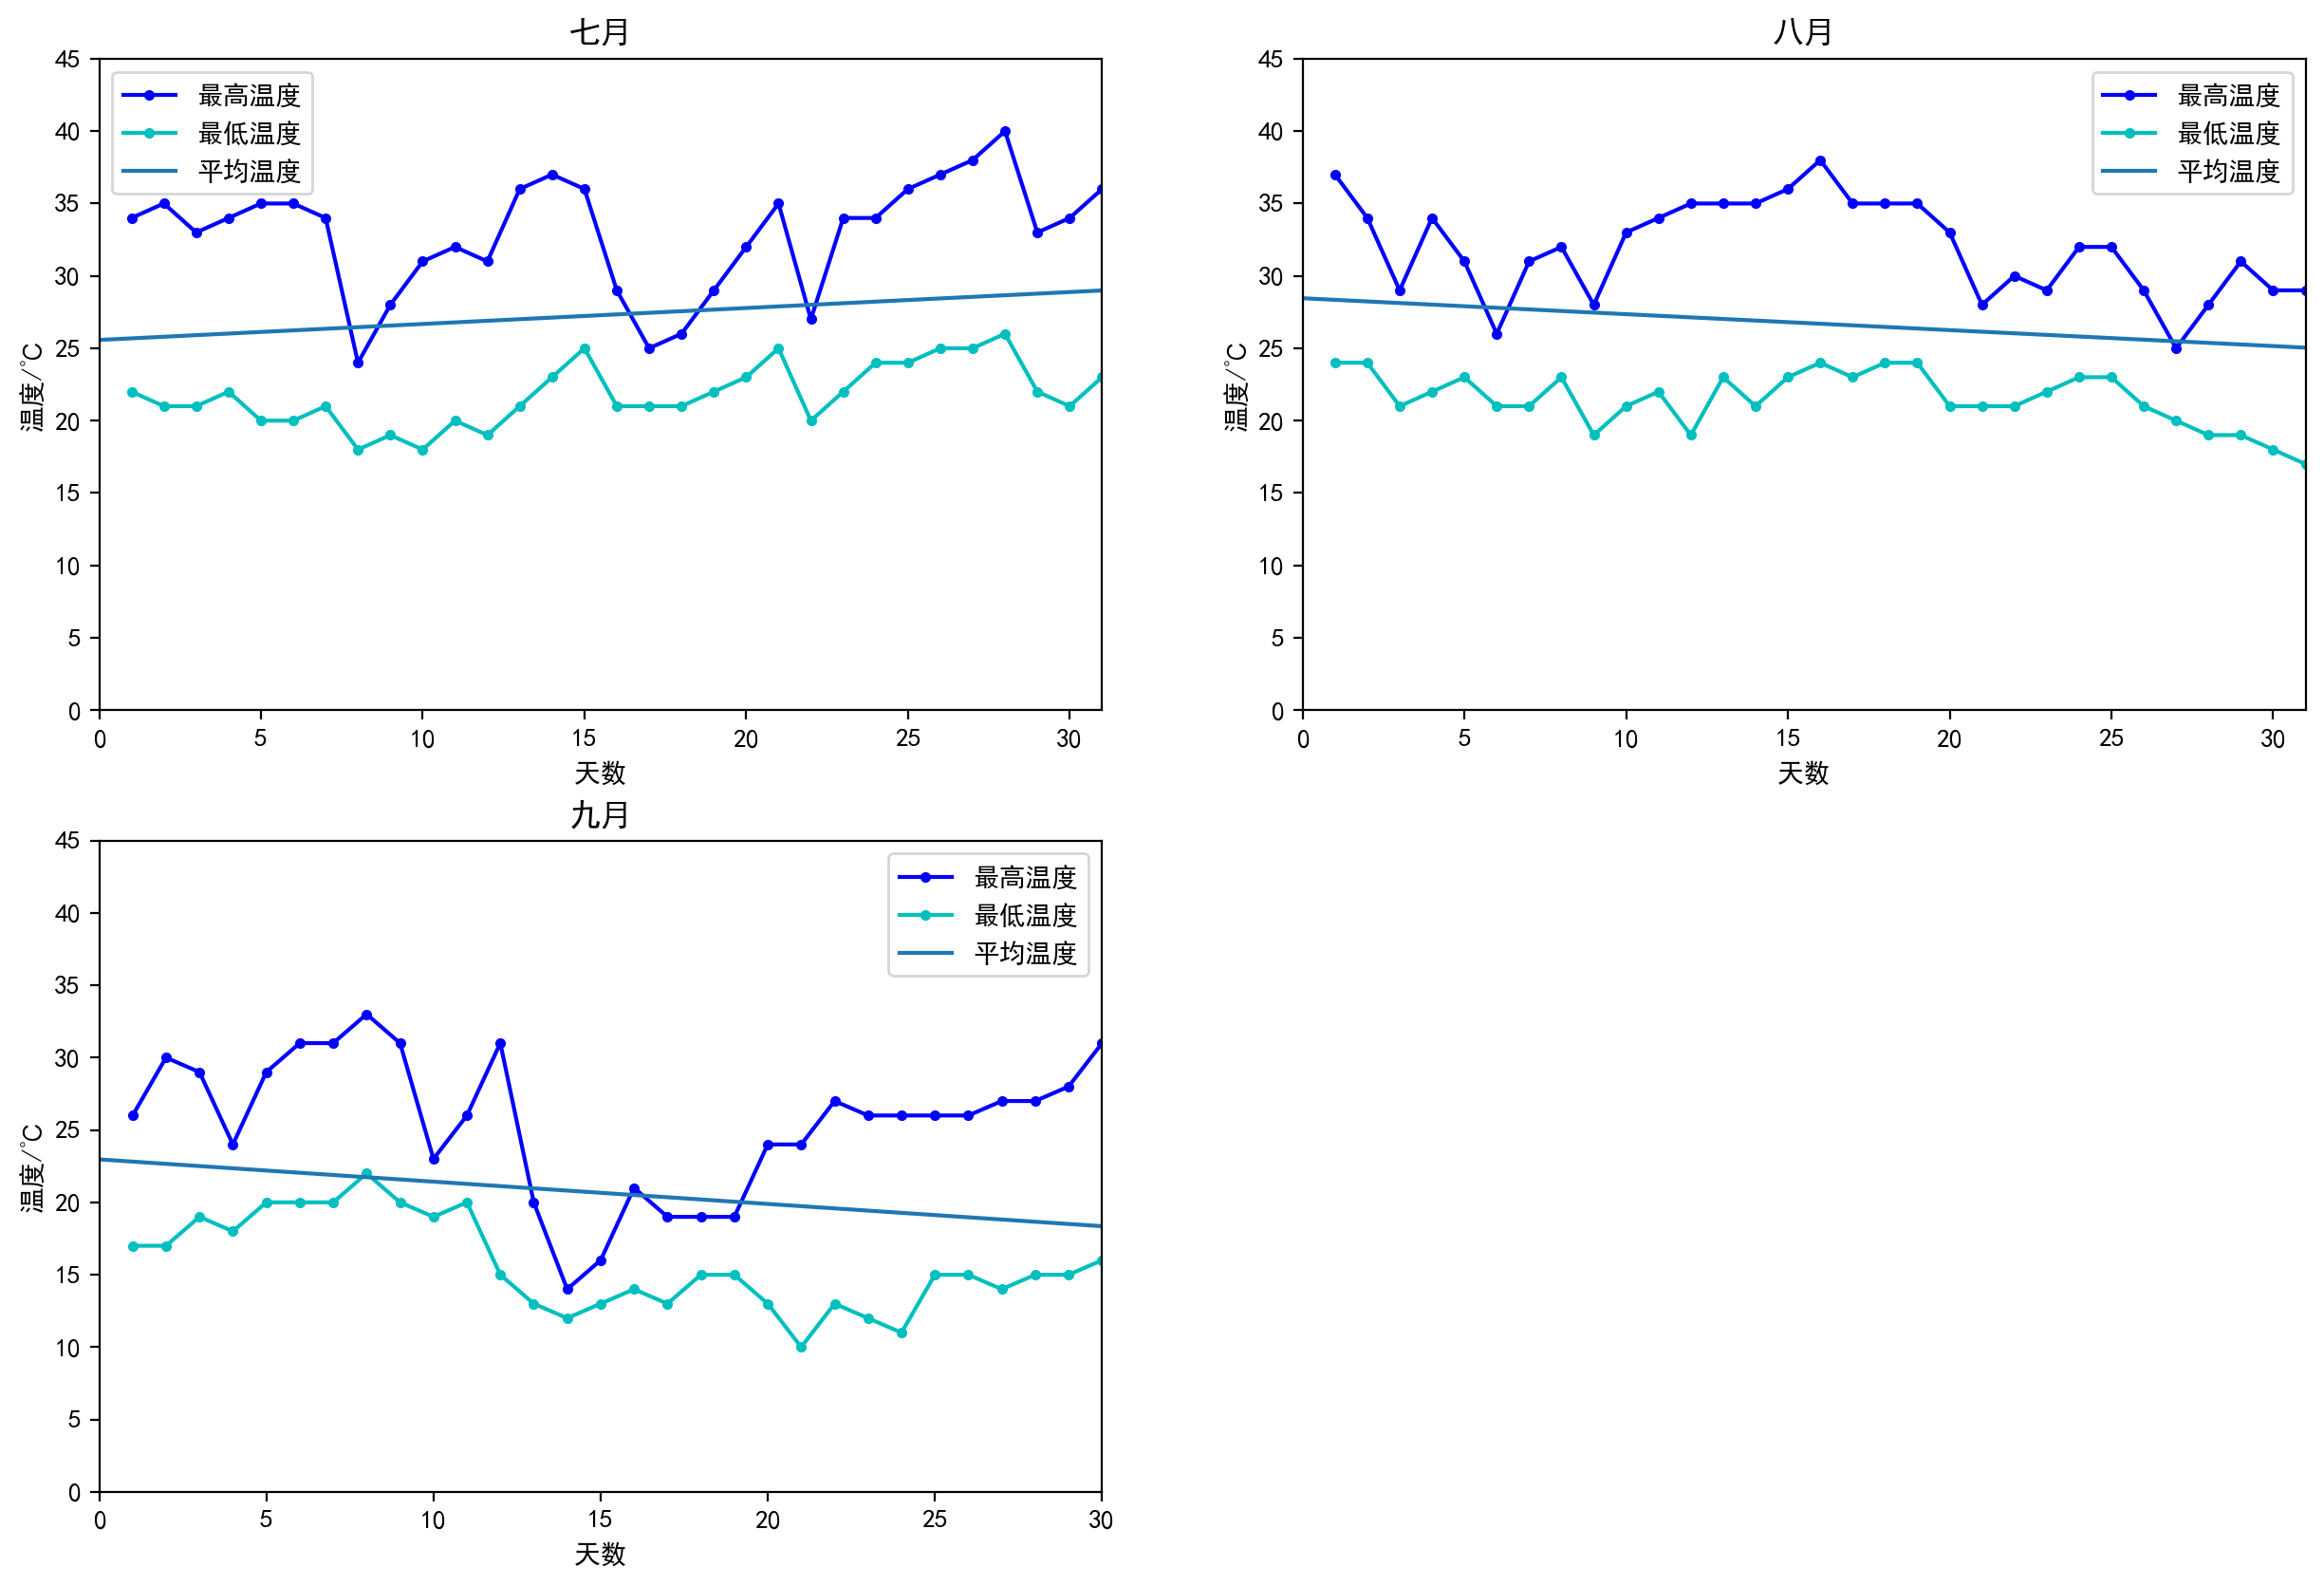

七月的平均温度为: 27.338709677419356 八月的平均温度为: 26.693548387096776 九月的平均温度为: 20.583333333333332


In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import math as mt
# 生成G矩阵。并把ｙ作为最后一列存放,m为插值多项式次数
def matrixg(x, y):
    n = len(y)
    G = np.zeros((0, n))
    print(G)
    for i in range(0, 2):
        g = np.power(x, i)
        G = np.vstack((G, g))  # 矩阵拼接生成G的转置矩阵
    y = np.array(y)  # 将y列表转换为矩阵
    G = np.vstack((G, y))
    G = np.transpose(G)  # 对矩阵进行转置,y存储在G矩阵的最后一列
    return (G)
# 最小二乘拟合
def LSS(G):
    m = G.shape[0]  # 矩阵的行数
    n = G.shape[1] - 1  # 矩阵的G矩阵除去y后的列数
    w = np.zeros(m)
# 生成Qk矩阵
    for k in range(0, n):
        s = 0
        for i in range(k, m):
            s = s + mt.pow((G[i][k]), 2)
        sgm = -np.sign(G[k][k]) * mt.sqrt(s)
        w[k] = G[k][k] - sgm
        for j in range(k + 1, m):
            w[j] = G[j][k]
        bt = sgm * w[k]
# Gk-1变换到Gk
        G[k][k] = sgm
        for j in range(k + 1, n + 1):
            t = 0
            for i in range(k, m):
                t = t + w[i] * G[i][j]
            t = t / bt
            for i in range(k, m):
                G[i][j] = G[i][j] + t * w[i]
# 解三角方程
    a = np.zeros(n)
    a[n - 1] = G[n - 1][n] / G[n - 1][n - 1]
    for i in range(n-2,-1,-1):
        s = 0
        for j in range(i+1, n):
            s = s + G[i][j] * a[j]
        a[i] = (G[i][n] - s) / G[i][i]
# 计算误差
    w = 0
    for i in range(n, m):
        w = w + mt.pow(G[i][n], 2)
    return a, w
# 求解多项式y的值
def solve(x, a):
    n = len(a)
    m = x.shape[0]
    y = np.zeros(m)
    for i in range(m):
        for j in range(n):
            y[i] =y[i]+a[j] * mt.pow(x[i], j)
    return y
#画图并且将七八九月份的图放在一张画布上
def ps(x1,y1,y1max,y1min,x2,y2,y2max,y2min,x3,y3,y3max,y3min):
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    c = plt.figure(figsize=(15,10),dpi=200)
    c1=c.add_subplot(2,2,1)
    plt.plot(x1, y1max, linestyle='-', marker='.', color='b')
    plt.plot(x1, y1min, linestyle='-', marker='.', color='c')
    G = matrixg(x1, y1)
    a, w = LSS(G)
    X1 = np.arange(0, len(x1), 0.001)
    Y1 = solve(X1, a)
    plt.plot(X1, Y1)
    plt.xlim([0, len(x1)])
    plt.ylim([0, 45])
    plt.legend(['最高温度', "最低温度","平均温度"])
    plt.title("七月")
    plt.xlabel('天数')
    plt.ylabel('温度/℃')
    c2=c.add_subplot(2,2,2)
    plt.plot(x2, y2max, linestyle='-', marker='.', color='b')
    plt.plot(x2, y2min, linestyle='-', marker='.', color='c')
    G = matrixg(x2, y2)
    a, w = LSS(G)
    X2 = np.arange(0, len(x2), 0.001)
    Y2 = solve(X2, a)
    plt.plot(X2, Y2)
    plt.xlim([0, len(x2)])
    plt.ylim([0, 45])
    plt.legend(['最高温度', "最低温度","平均温度"])
    plt.title("八月")
    plt.xlabel('天数')
    plt.ylabel('温度/℃')
    c3=c.add_subplot(2,2,3)
    plt.plot(x3, y3max, linestyle='-', marker='.', color='b')
    plt.plot(x3, y3min, linestyle='-', marker='.', color='c')
    G = matrixg(x3, y3)
    a, w = LSS(G)
    X3 = np.arange(0, len(x2), 0.001)
    Y3 = solve(X3, a)
    plt.plot(X3, Y3)
    plt.xlim([0, len(x3)])
    plt.ylim([0, 45])
    plt.legend(['最高温度', "最低温度","平均温度"])
    plt.title("九月")
    plt.xlabel('天数')
    plt.ylabel('温度/℃')
    plt.show()

x7 = np.arange(1, 32, 1)
x8 = np.arange(1, 32, 1)
x9 = np.arange(1, 31, 1)
y7max = [34,35,33,34,35,35,34,24,28,31,32,31,36,37,36,29,25,26,
         29,32,35,27,34,34,36,37,38,40,33,34,36]
y7min =[22,21,21,22,20,20,21,18,19,18,20,19,21,23,25,21,21,
        21,22,23,25,20,22,24,24,25,25,26,22,21,23]
y8max =[37,34,29,34,31,26,31,32,28,33,34,35,35,35,36,
        38,35,35,35,33,28,30,29,32,32,29,25,28,31,29,29]
y8min =[24,24,21,22,23,21,21,23,19,21,22,19,23,21,23,24,
        23,24,24,21,21,21,22,23,23,21,20,19,19,18,17]
y9max =[26,30,29,24,29,31,31,33,31,23,26,31,20,14,16,
        21,19,19,19,24,24,27,26,26,26,26,27,27,28,31]
y9min =[17,17,19,18,20,20,20,22,20,19,20,15,13,12,13,
        14,13,15,15,13,10,13,12,11,15,15,14,15,15,16]
y7av= [(y7max[i]+y7min[i])/2 for i in range(0,len(x7))]
y8av= [(y8max[i]+y8min[i])/2 for i in range(0,len(x8))]
y9av= [(y9max[i]+y9min[i])/2 for i in range(0,len(x9))]
T7 = (np.sum(y7av) / (len(y7av)))
T8 = (np.sum(y8av) / (len(y8av)))
T9 = (np.sum(y9av) / (len(y9av)))
ps(x7,y7av,y7max,y7min,x8,y8av,y8max,y8min,x9,y9av,y9max,y9min)
print('七月的平均温度为:', T7,'八月的平均温度为:', T8,'九月的平均温度为:', T9)


In [2]:
import numpy as np
from sympy import *
import math as mt
import matplotlib.pyplot as plt
#生成关于M的方程组
def splinem(n,x,y):
    M = [0]*n
    h = [0]*n
    a = [0]*n
    b = [0]*n
    c = [0]*n
    for i in range(n):
        M[i] = y[i]
    for k in range(1,3):
        for i in range((n-1),(k-1),-1):
            M[i] = (M[i]-M[i-1])/(x[i]-x[i-k])
    h[0] = x[1]-x[0]
    for i in range (1,(n-1)):
        h[i] = x[i+1]-x[i]
        c[i] = h[i+1]/(h[i-1]+h[i])
        a[i] = 1-c[i]
        b[i] = 2
        M[i] = 6*M[i+1]
#根据边界条件赋值（自然三次样条）
    M[0] = 0
    M[n-1] = 0
    c[0] = 0
    b[0] = 2
    a[n-1] = 0
    b[n-1] = 2
    return a,b,c,h,M


In [3]:
#追赶法解方程组得到M
def TSS(a,b,c,M,n,x):
    l = [0]*n
    u = [0]*n
    x1 = [0]*n
    y1 = [0]*n
    u[0] = b[0]
    y1[0] = M[0]
    for k in range(1,n):
        l[k] = a[k]/u[k-1]
        u[k] = b[k]-l[k]*c[k-1]
        y1[k] = M[k]-l[k]*y1[k-1]
    x1[n-1] = M[n-1]/u[n-1]
    for k in range((n-1),1,-1):
        x1[k-1] = (y1[k-1]-c[k-1]*x1[k])/u[k-1]
    return x1
#找出给定点所在的区间,并求解给定点处的数值
def solve(x,y,x1,n,n1,M):
    s = [0]*n1
    for i in range(0,n1):
        for j in range(1,n):
            k = 1
            if(x1[i]<=x[j]):
                k = j
                break
            else:
                k = j+1
        h = x[k]-x[k-1]
        x2 = x[k]-x1[i]
        x3 = x1[i]-x[k-1]
        s[i] = (M[k-1]*(x2**3)/6+ M[k]*(x3**3)/6+(y[k-1]-(M[k-1]*(h**2)/6))*x2+(y[k]-(M[k]*(h**2)/6))*x3)/h
    return s


In [4]:
#计算曲线的长度
def length(x,s):
     n = len(s)-1
     l = 0
     for i in range(0,n):
         l = l+ mt.sqrt((x[i+1]-x[i])**2+(s[i+1]-s[i])**2)
     return l


光缆的长度为： 66.45741096810791


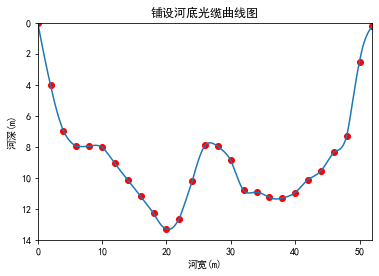

In [5]:
#绘制图形
def draw(x1,s,x,y):
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.plot(x,y, 'ro', x1, s)
    plt.ylim(ymax=14)
    plt.ylim(ymin=0)
    plt.xlim(xmax=52)
    plt.xlim(xmin=0)
    ax = plt.gca()
    ax.invert_yaxis()  # y轴反向
    xmajorLocator = plt.MultipleLocator(1)
    plt.title('铺设河底光缆曲线图')
    plt.xlabel('河宽(m)')
    plt.ylabel('河深(m)')
    plt.show()

x = np.arange(0,54,2) #在0-52间距为2的等距数组，因为np.arrange 函数不包含终值因此要到54
y = [0,4.01,6.96,7.96,7.97,8.02,9.05,10.13,11.18,12.26,\
   13.28,12.61,10.22,7.90,7.95,8.86,10.80,10.93,11.23,\
   11.30,10.94,10.10,9.54,8.30,7.30,2.50,0.20]
m = np.linspace(0,52,100000)
n = len(x)
n1 = len(m)
a,b,c,h,M = splinem(n,x,y)#得到关于M的方程组
x1 = TSS(a,b,c,M,n,x)#解方程组得M
s = solve(x,y,m,n,n1,x1)#得到拟合曲线
l = length(m,s)#计算曲线的长度
print("光缆的长度为：",l)
draw(m,s,x,y)
